# Jobsheet 02 - Regression

Isikan identitas berikut
<br>
<br>NIM: 2041720018
<br>Nama: Dherisma Hanindita Utami 
<br>Kelas: TI 3H

## Tujuan
1. Mahasiswa mampu menjelaskan konsep regresi
2. Mahasiswa mampu menerapkan konsep regresi untuk kasus prediksi data

## Kegiatan Praktikum

Kegiatan praktikum ini membutuhkan dataset untuk diolah datanya menjadi sebuah analisis prediksi. Ikuti petunjuk dari dosen pengampu mengenai data apa saja yang boleh dipakai untuk kegiatan praktikum kali ini. Data yang ditampilkan pada jobsheet hanya sebuah contoh, mahasiswa harus mencari data sendiri dan memastikan data yang diperoleh tersebut sesuai dengan kasus yang dapat diselesaikan dengan regresi.

### Persiapan Data

In [ ]:
# import package
import numpy as np
import pandas as pd

In [ ]:
# baca data
data = pd.read_csv('daily.csv')
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [ ]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


### Visualisasi Data

In [ ]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


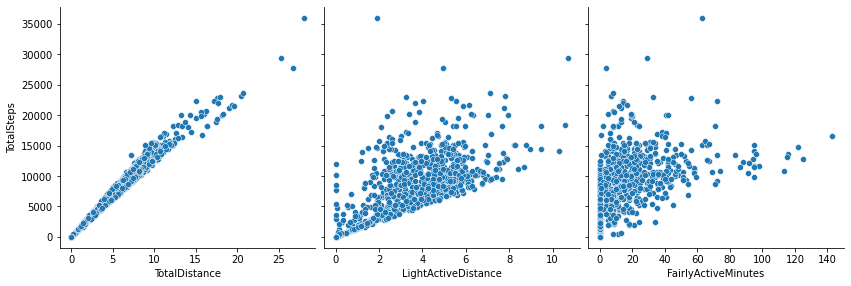

In [ ]:
# operasi visualisasi
sns.pairplot(data, x_vars=['TotalDistance', 'LightActiveDistance','FairlyActiveMinutes'], 
             y_vars='TotalSteps', size=4, aspect=1, kind='scatter')
plt.show()

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

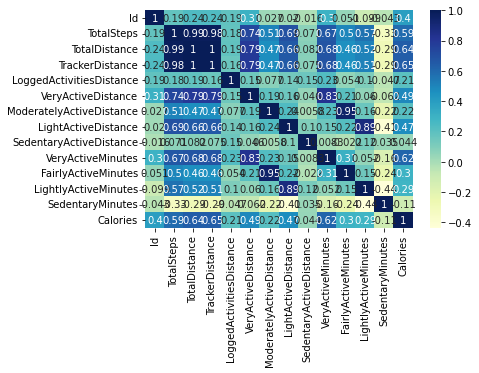

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

dari bentuk visualisasi di atas terlihat bahwa TrackerDistance memiliki korelasi yang paling kuat terhadap TotalSteps

### Regresi Linier

In [ ]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['TotalDistance']
y = data['TotalSteps']

In [ ]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


In [ ]:
# hasil training dtaset
X_train
y_train

720    13744
105        0
515     1664
420    10553
69     11256
       ...  
855     3864
871     3588
835     6175
792    13953
520     7047
Name: TotalSteps, Length: 658, dtype: int64

In [ ]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const             634.324120
TotalDistance    1275.405826
dtype: float64

In [ ]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TotalSteps   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 2.033e+04
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:02:37   Log-Likelihood:                -5418.0
No. Observations:                 658   AIC:                         1.084e+04
Df Residuals:                     656   BIC:                         1.085e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           634.3241     61.376     10.335      0.000     513.806     754.842
TotalDistance  1275.4058      8.945    142.576      0.000    1257.841    1292.971
==============================================================================
Omnibus:                      189.232   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1964.399
Skew:                          -0.965   Prob(JB):                         0.00
Kurtosis:                      11.241   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

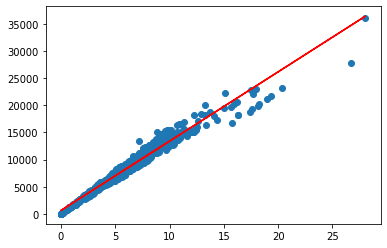

In [ ]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 634.324120 + 1275.405826*X_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [ ]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


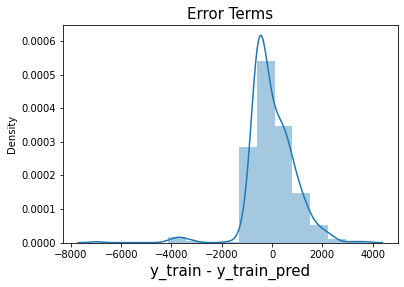

In [ ]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

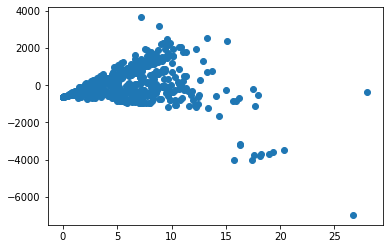

In [ ]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


143    3975.887239
229    3720.806317
116     672.586294
134    3236.151957
596    4511.557784
dtype: float64

In [ ]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.9765062089918752

perlu diperhatikan bahwa r^2 dari data trainign adalah 0.969 sedangkan dari data testing adalah 0.976
<br>Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

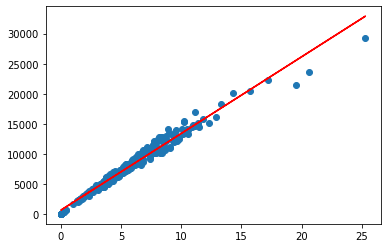

In [ ]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

### Regresi Linier Berganda

In [ ]:
# define x1 x2 dan y
# untuk regresi linier berganda pada kasus kali ini, selain Length of Membership sebagai X1 dan Yearly Amount Spent
xbaru = data[['TrackerDistance', 'ModeratelyActiveDistance']]
ybaru = data['TotalSteps']

In [ ]:
# define konstanta pada x
xConst = sm.add_constant(xbaru)

In [ ]:
model = sm.OLS(ybaru, xConst).fit()
predictions = model.predict(xConst)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             TotalSteps   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 1.648e+04
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:30:36   Log-Likelihood:                -7669.2
No. Observations:                 940   AIC:                         1.534e+04
Df Residuals:                     937   BIC:                         1.536e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

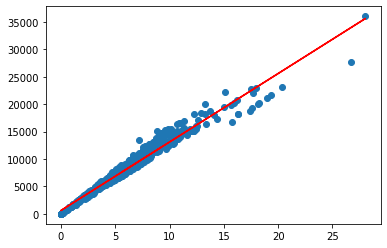

In [ ]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 622.1661 + 1247.6438*X_train, 'r')
plt.show()